# Question 3 practical

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

n=15
z0 = [3,1,2,1,3,1,2,2,2,3,3,2,1,1,3]

# from theorical question 9
adj = np.array( [[2 for i in range(n)] for j in range(n)] )
for i in range(n):
    adj[i][i] = 1

## Question 4
let's calculate hamming distance of z0 and z1


In [1]:
def hamming_dist(z1,z2):
    out = 0
    for i in range(len(z1)):
        if z1[i]!=z2[i]:
            out += 1
    return out

## Question 5
let's solve hamming problem. we need to generate a good amount of vectors and report the minimum hamming_dist of them using premutation.

In [2]:
# a recursive function to traverse all possible paths to create all premutations
def find_permutations(vector, remained , passed):
    if len(remained) == 0:
        vector.append(passed.copy())
        return
    for x in remained:
        remained=remained.copy()
        remained.remove(x)
        passed.append(x)
        find_permutations(vector,remained,passed)
        passed.pop()
    return

In [13]:
def min_hamming(z1,z2):
    m = 100000           # m must report minimum so at the beggining it should be really large
    vector = []
    seen = set()
    for i in z2:
        seen.add(i)
    find_permutations(vector,seen,[])
    for z in vector:
        seen = []
        for i in z2:
            seen.append(i-1)
        m = min(m,hamming_dist(z1,seen))
    return m

## Question 6


In [17]:
def calc_l_z(adj,z,n,p,q):
    sum = 0
    for i in range(n):
        for j in range(i+1,n):
            if z[i]==z[j]:    # same table
                if adj[i][j] == 1:
                    sum += np.log(p)
                else:
                    sum += np.log(1-p)
            else:
                if adj[i][j] == 1:
                    sum += np.log(q)
                else:
                    sum += np.log(1-q)
    return (-1) * sum

calc_l_z(adj , z0 , 15 , 0.6 , 0.1)   

35.39076063056161

## Question 7

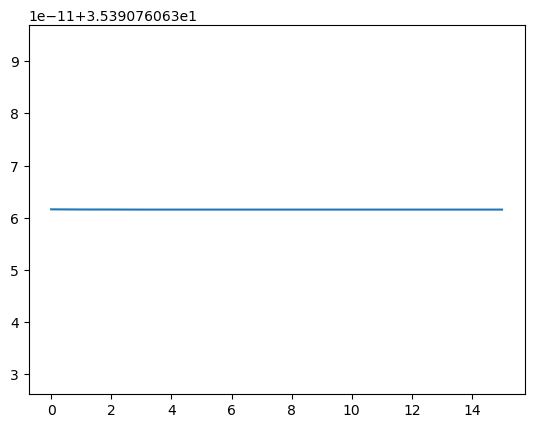

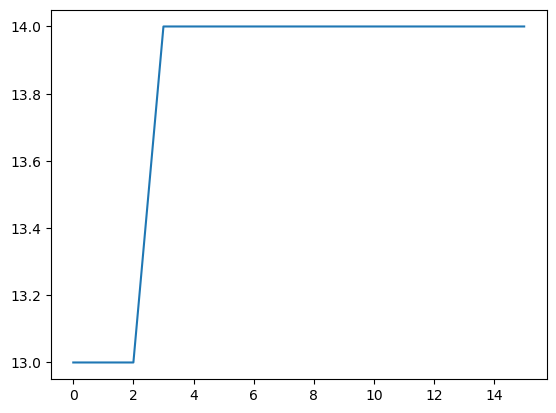

[2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3] 35.390760630561566


In [26]:
T = 15
est_z = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]

def find_estimate(est_z,T):
    estimates = []
    dist = []
    estimates.append(calc_l_z(adj,est_z,15,0.6,0.1))
    dist.append(min_hamming(z0,est_z))
    for k in range(T):
        lowest = 1000000
        i_best = 0
        j_best = 0
        for i in range(n):
            for j in range(n):
                est_z[i],est_z[j] = est_z[j],est_z[i]
                this = calc_l_z(adj,est_z,15,0.6,0.1)
                if(lowest> this ):     # update best i and j indexex
                    lowest = this
                    i_best = i
                    j_best = j
                est_z[i],est_z[j] = est_z[j],est_z[i]

        est_z[i_best],est_z[j_best] = est_z[j_best],est_z[i_best]
        estimates.append(lowest)
        dist.append(min_hamming(z0,est_z))

    plt.plot(estimates)
    plt.show()
    plt.plot(dist)
    plt.show()
    print(est_z,estimates[-1])

find_estimate(est_z,T)

## Question 8
let's run it 10 times

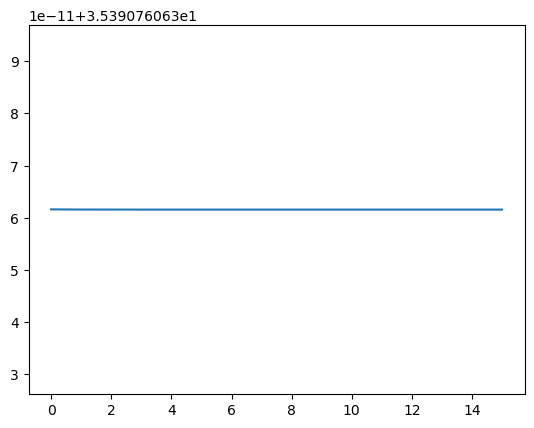

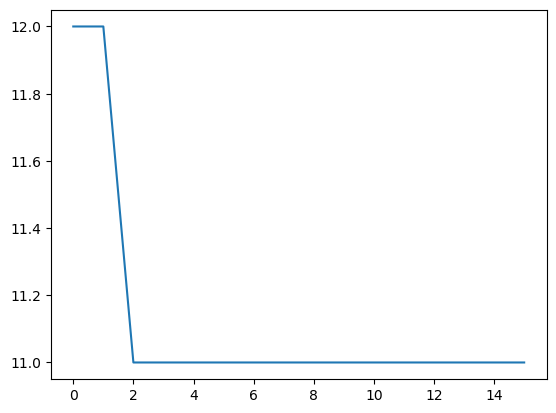

[3, 2, 1, 3, 3, 3, 1, 1, 3, 1, 1, 2, 2, 2, 2] 35.390760630561566


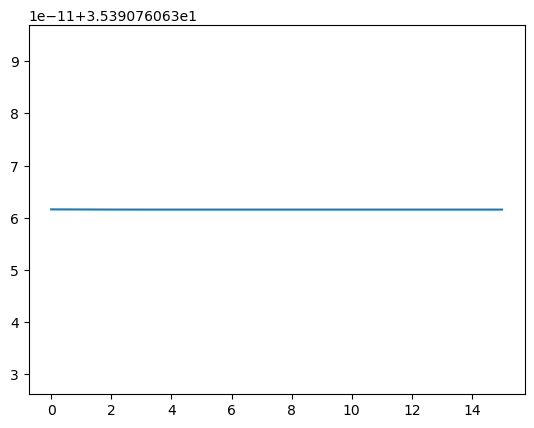

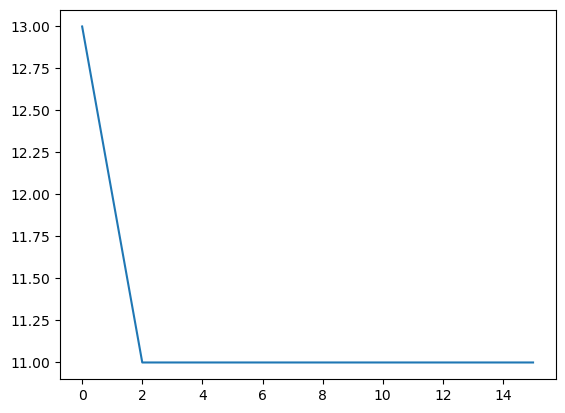

In [ ]:
estimates = []
for i in range(10):
    random.shuffle(est_z)
    find_estimate(est_z,T)
    estimates.append(est_z.copy())